In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.pyplot import figure
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BTC_monthly = pd.read_csv('/content/drive/Shareddrives/Crypto SP500 /data for arima/BTC-USD-monthly.csv')

BTC_monthly['Date'] = pd.to_datetime(BTC_monthly['Date'], infer_datetime_format=True)
BTC_monthly

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
1,2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2,2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
3,2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
4,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700
...,...,...,...,...,...,...,...
82,2021-08-01,41460.843750,50482.078125,37458.003906,47166.687500,47166.687500,1014674184428
83,2021-09-01,47099.773438,52853.765625,39787.609375,43790.894531,43790.894531,1102139678824
84,2021-10-01,43816.742188,66930.390625,43320.023438,61318.957031,61318.957031,1153077903534
85,2021-11-01,61320.449219,68789.625000,53569.765625,53569.765625,53569.765625,925513092338


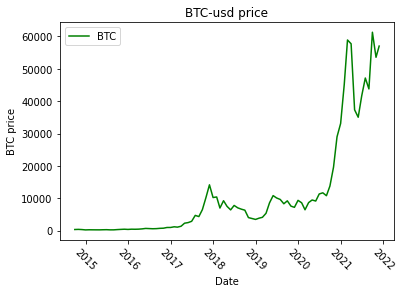

In [ ]:
line = plt.plot(BTC_monthly['Date'],BTC_monthly['Close'], 'green',label = 'BTC')
plt.title('BTC-usd price')
plt.legend()
plt.xticks(rotation = -45)
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.show()

https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima

reference 

In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
BTC_monthly.drop(columns=(['Open','High','Low','Adj Close','Volume']),axis=1,inplace=True)
indexedBTC_monthly=BTC_monthly.set_index(['Date'])
indexedBTC_monthly

,Close
Date,
2014-10-01,338.321014
2014-11-01,378.046997
2014-12-01,320.192993
2015-01-01,217.464005
2015-02-01,254.263000
...,...
2021-08-01,47166.687500
2021-09-01,43790.894531
2021-10-01,61318.957031


In [ ]:
#From the plot below, we can see that there is a Trend compoenent in th series. 
#Hence, we now check for stationarity of the data
#Determine rolling statistics
rolmean = indexedBTC_monthly.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedBTC_monthly.rolling(window=12).std()
print(rolmean,rolstd)

                   Close
Date                    
2014-10-01           NaN
2014-11-01           NaN
2014-12-01           NaN
2015-01-01           NaN
2015-02-01           NaN
...                  ...
2021-08-01  35773.656738
2021-09-01  38523.929769
2021-10-01  42485.426595
2021-11-01  45314.087402
2021-11-28  47650.387695

[87 rows x 1 columns]                    Close
Date                    
2014-10-01           NaN
2014-11-01           NaN
2014-12-01           NaN
2015-01-01           NaN
2015-02-01           NaN
...                  ...
2021-08-01  15652.583311
2021-09-01  13632.324435
2021-10-01  12661.042367
2021-11-01  10734.852987
2021-11-28   9878.577099

[87 rows x 1 columns]


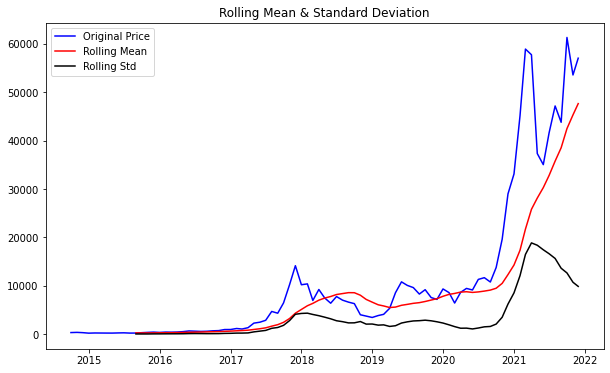

In [ ]:
#Plot rolling statistics
orig = plt.plot(indexedBTC_monthly, color='blue', label='Original Price')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best') #upper left location
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
'''

"From the above graph, we see that rolling mean itself has a trend component even though 
rolling standard deviation is fairly constant with time. For our time series to be stationary, 
we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. 
Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test."

'''


'\n\n"From the above graph, we see that rolling mean itself has a trend component even though \nrolling standard deviation is fairly constant with time. For our time series to be stationary, \nwe need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. \nThus the curves for both of them have to be parallel to the x-axis, which in our case is not so.\n\nTo further augment our hypothesis that the time series is not stationary, let us perform the ADCF test."\n\n'

In [ ]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedBTC_monthly['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  0.961767
p-value                         0.993846
#Lags Used                      6.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64




For a Time series to be stationary, its ADCF test should have:

  p-value to be low (according to the null hypothesis)
  The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary


Data Transformation to achieve Stationarity

There are a couple of ways to achieve stationarity through data transformation like taking log10
,loge

, square, square root, cube, cube root, exponential decay, time shift and so on ...

In our notebook, lets start of with log transformations. Our objective is to remove the trend component. Hence, flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

#Log Scale Transformation

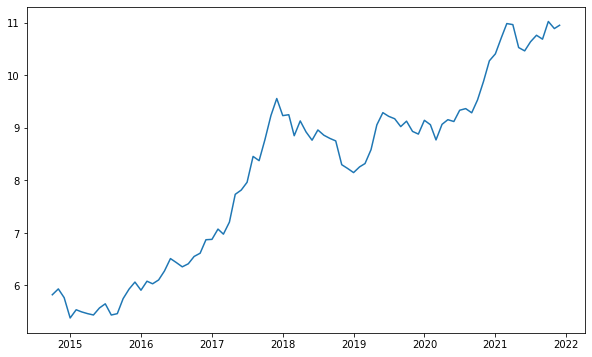

In [ ]:


#Estimating trend
indexedBTC_monthly_logScale = np.log(indexedBTC_monthly)
plt.plot(indexedBTC_monthly_logScale)



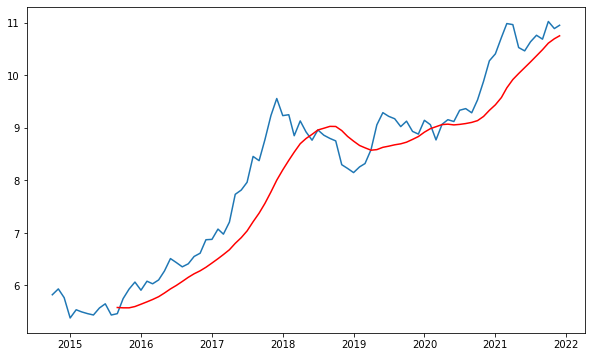

In [ ]:
#The below transformation is required to make series stationary
movingAverage = indexedBTC_monthly_logScale.rolling(window=12).mean()
movingSTD = indexedBTC_monthly_logScale.rolling(window=12).std()
plt.plot(indexedBTC_monthly_logScale)
plt.plot(movingAverage, color='red')


From above graph, we see that even though rolling mean is not stationary, it is still better than the previous case, where no transfromation were applied to series. So we can atleast say that we are heading in the right direction.

We know from above graph that both the Time series with log scale as well as its moving average have a trend component. Thus we can apply a elementary intuition: subtraction one from the other should remove the trend component of both. Its like:

logscaleL=stationarypart(L1)+trend(LT)

movingavgoflogscaleA=stationarypart(A1)+trend(AT)
resultseriesR=L−A=(L1+LT)−(A1+AT)=(L1−A1)+(LT−AT)

Since, L & A are series & it moving avg, their trend will be more or less same, Hence
LT-AT nearly equals to 0

Thus trend component will be almost removed. And we have,

R=L1−A1
, our final non-trend curve

In [ ]:
datasetLogScaleMinusMovingAverage = indexedBTC_monthly_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)


,Close
Date,
2015-09-01,-0.117237
2015-10-01,0.174771
2015-11-01,0.358106
2015-12-01,0.465431
2016-01-01,0.266483
2016-02-01,0.392581
2016-03-01,0.298961
2016-04-01,0.318607
2016-05-01,0.418877


In [ ]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    



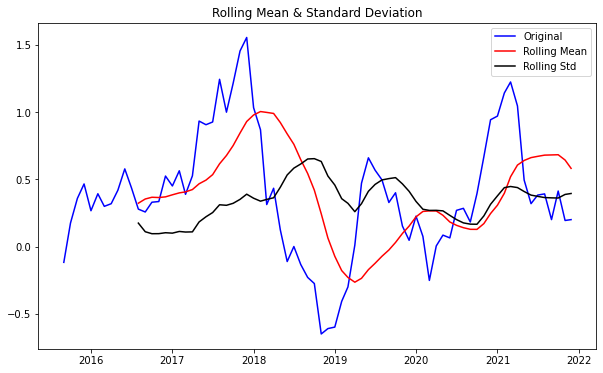

Results of Dickey Fuller Test:
Test Statistic                 -2.858437
p-value                         0.050399
#Lags Used                      3.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)



From above graph, we observe that our intuition that "subtracting two related series having similar trend components will make the result stationary" is true. We find that:

  p-value has reduced from 0.99 to 0.050399.
  The critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. Thus, from above 2 points, we can say that our given series is stationary.

But, in the spirit of getting higher accuracy, let us explore & try to find a better scale than our current log.

Let us try out Exponential decay.



#Exponential Decay Transformation 

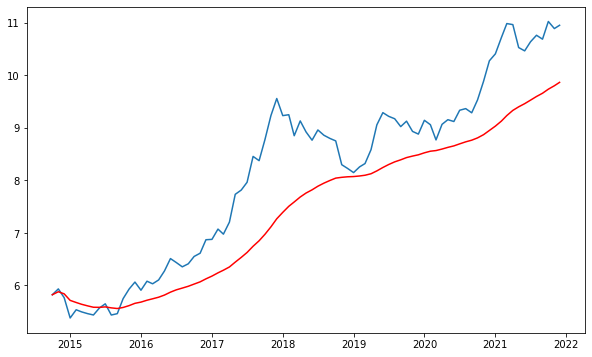

In [ ]:
exponentialDecayWeightedAverage = indexedBTC_monthly_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedBTC_monthly_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')


From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are similar. But, in statistics, inferences cannot be drawn simply by looking at the curves. Hence, we perform the ADCF test again on the decay series below.

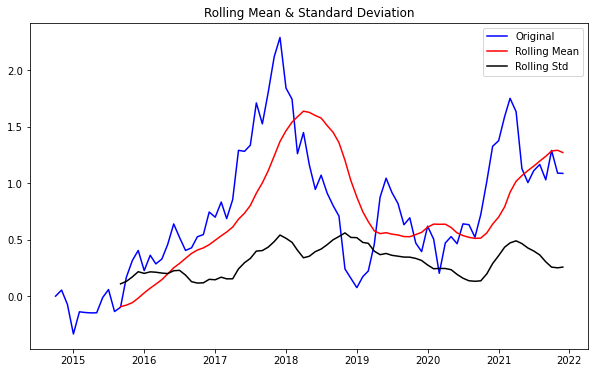

Results of Dickey Fuller Test:
Test Statistic                 -1.802144
p-value                         0.379398
#Lags Used                      0.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64


In [ ]:
datasetLogScaleMinusExponentialMovingAverage = indexedBTC_monthly_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

#p-value is not very good and the series for moving avg & std. dev. is not parallel to x-axis

#Time Shift Transformation 

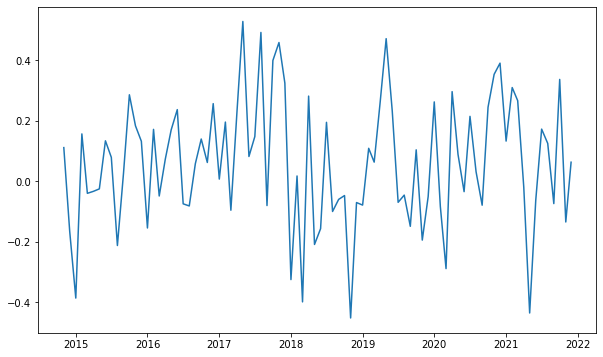

In [ ]:
datasetLogDiffShifting = indexedBTC_monthly_logScale - indexedBTC_monthly_logScale.shift()
plt.plot(datasetLogDiffShifting)


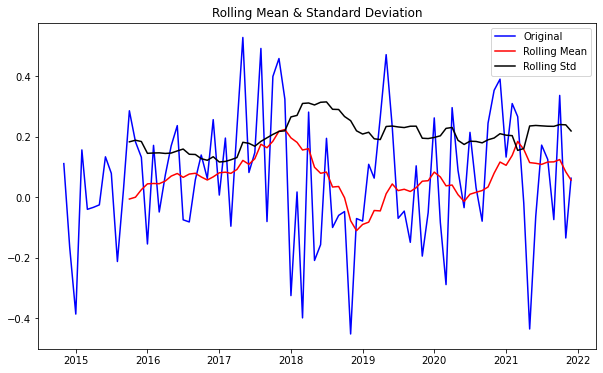

Results of Dickey Fuller Test:
Test Statistic                -8.061634e+00
p-value                        1.637048e-12
#Lags Used                     0.000000e+00
Number of Observations Used    8.500000e+01
Critical Value (1%)           -3.509736e+00
Critical Value (5%)           -2.896195e+00
Critical Value (10%)          -2.585258e+00
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

We have thus tried out 3 different transformation: log, exp decay & time shift. For simplicity, we will go with the log scale. The reason for doing this is that we can revert back to the original scale during forecasting.
Let us now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part.

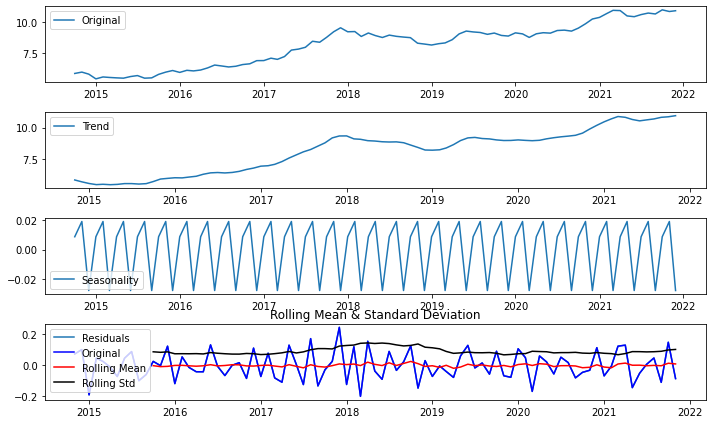

Results of Dickey Fuller Test:
Test Statistic                -6.110299e+00
p-value                        9.367983e-08
#Lags Used                     6.000000e+00
Number of Observations Used    7.800000e+01
Critical Value (1%)           -3.517114e+00
Critical Value (5%)           -2.899375e+00
Critical Value (10%)          -2.586955e+00
dtype: float64


In [ ]:
decomposition = seasonal_decompose(indexedBTC_monthly_logScale, freq=3) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedBTC_monthly_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

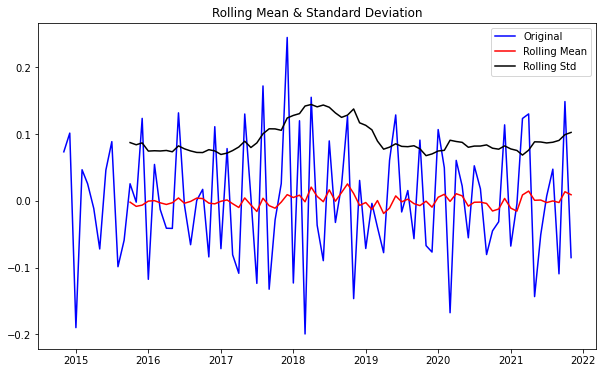

Results of Dickey Fuller Test:
Test Statistic                -6.110299e+00
p-value                        9.367983e-08
#Lags Used                     6.000000e+00
Number of Observations Used    7.800000e+01
Critical Value (1%)           -3.517114e+00
Critical Value (5%)           -2.899375e+00
Critical Value (10%)          -2.586955e+00
dtype: float64


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)



#Plotting ACF & PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



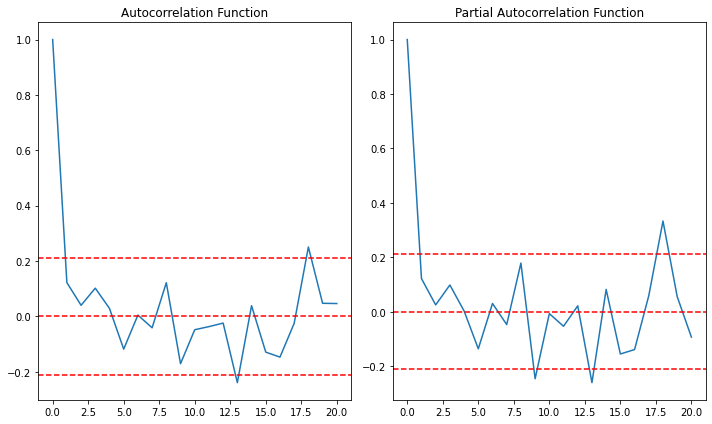

In [ ]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='red')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='red')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            



From the ACF graph, we see that curve touches y=0 and it crosses the first line at x=2 or 1. Thus, from theory, Q = 2 or 1 From the PACF graph, we see that curve touches y=0.0 line and crosses the first line at x=2 or 1. Thus, from theory, P = 2 or 1

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models wi:ll give a value of RSS. Lower RSS values indicate a better model.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide



Plotting AR model


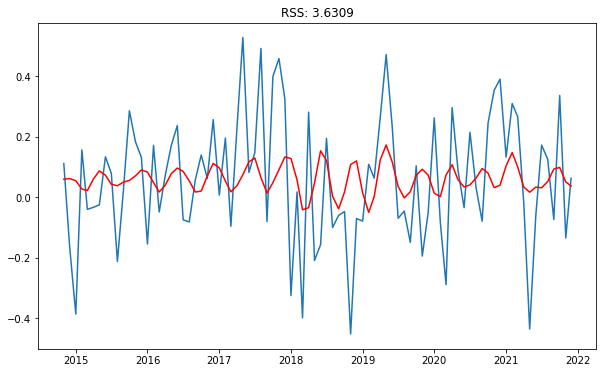

In [ ]:
#AR Model
#making order=(2,1,2) gives RSS=3.6309
model = ARIMA(indexedBTC_monthly_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting AR model')

Plotting MA model


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



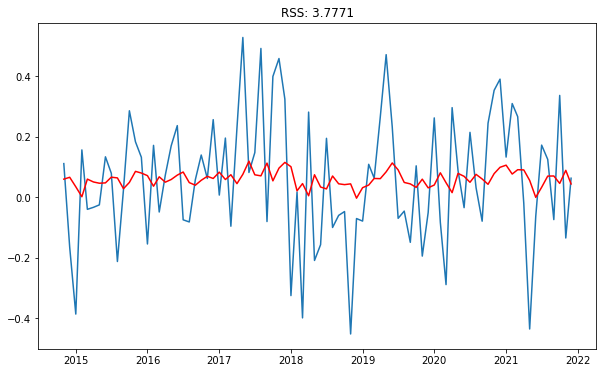

In [ ]:
#MA Model
model = ARIMA(indexedBTC_monthly_logScale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting MA model')

In [ ]:
#when we set ar and ma equal to 4, the arima model cannot work b/c it does not have stationary, so I change it into 3.

In [ ]:
# in MA model, rss = 3.7771 > 3.6309

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide



Plotting ARIMA model


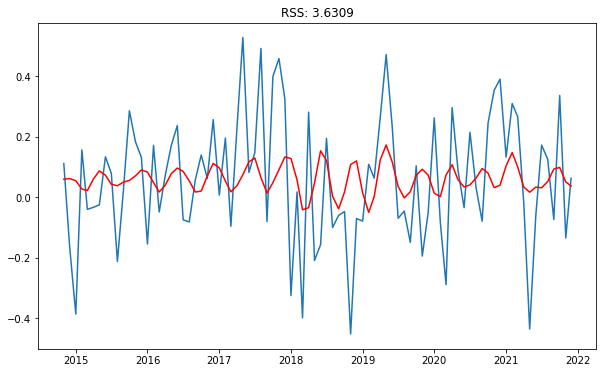

In [ ]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedBTC_monthly_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Close'])**2))
print('Plotting ARIMA model')



By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 3.5029, indicating ARIMA to be better than its individual component models.

With the ARIMA model built, we will now generate predictions. But, before we do any plots for predictions ,we need to reconvert the predictions back to original form. This is because, our model was built on log transformed data.


#Prediction & Reverse transformations

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2014-11-01    0.059373
2014-12-01    0.061583
2015-01-01    0.054196
2015-02-01    0.026983
2015-03-01    0.021836
dtype: float64


In [ ]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)



Date
2014-11-01    0.059373
2014-12-01    0.120957
2015-01-01    0.175153
2015-02-01    0.202136
2015-03-01    0.223972
                ...   
2021-08-01    4.845765
2021-09-01    4.938744
2021-10-01    5.037071
2021-11-01    5.087478
2021-11-28    5.124477
Length: 86, dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(indexedBTC_monthly_logScale['Close'].iloc[0], index=indexedBTC_monthly_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()



Date
2014-10-01    5.823995
2014-11-01    5.883369
2014-12-01    5.944952
2015-01-01    5.999148
2015-02-01    6.026131
dtype: float64

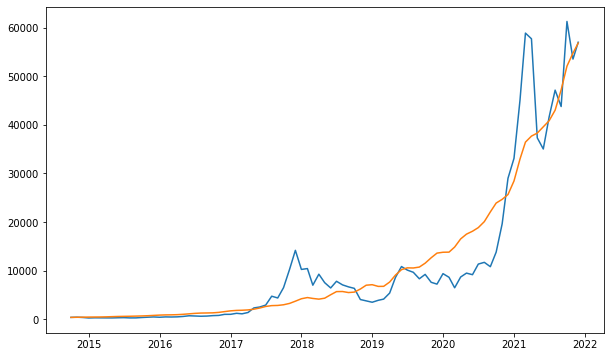

In [ ]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedBTC_monthly)
plt.plot(predictions_ARIMA)


In [ ]:
indexedBTC_monthly_logScale

,Close
Date,
2014-10-01,5.823995
2014-11-01,5.935019
2014-12-01,5.768924
2015-01-01,5.382033
2015-02-01,5.538369
...,...
2021-08-01,10.761443
2021-09-01,10.687181
2021-10-01,11.023844


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



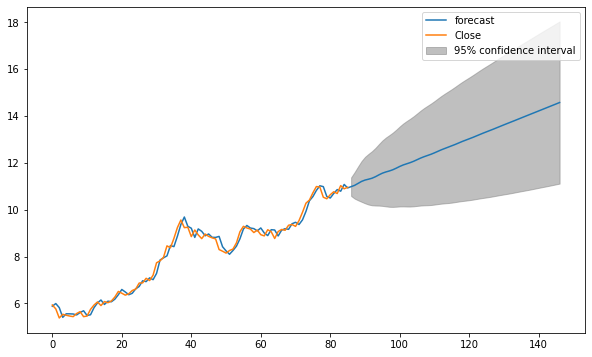

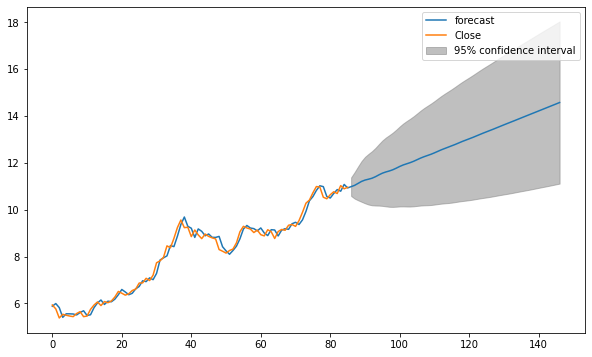

In [ ]:
#We have 87(existing data of 7 yrs in months) data points. 
#And we want to forecast for additional 60 data points for 5 yrs.
results_ARIMA.plot_predict(1,147) 




In [ ]:
#results_ARIMA.plot_predict(1,147)
#x = results_ARIMA.forecast(steps=60)